# DBSCAN

In [1]:
from sklearn import datasets
import pandas as pd

### Data Loading

In [2]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Clustering

In [4]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns = ['predict']

r = pd.concat([feature, predict], axis=1)
r.head()

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

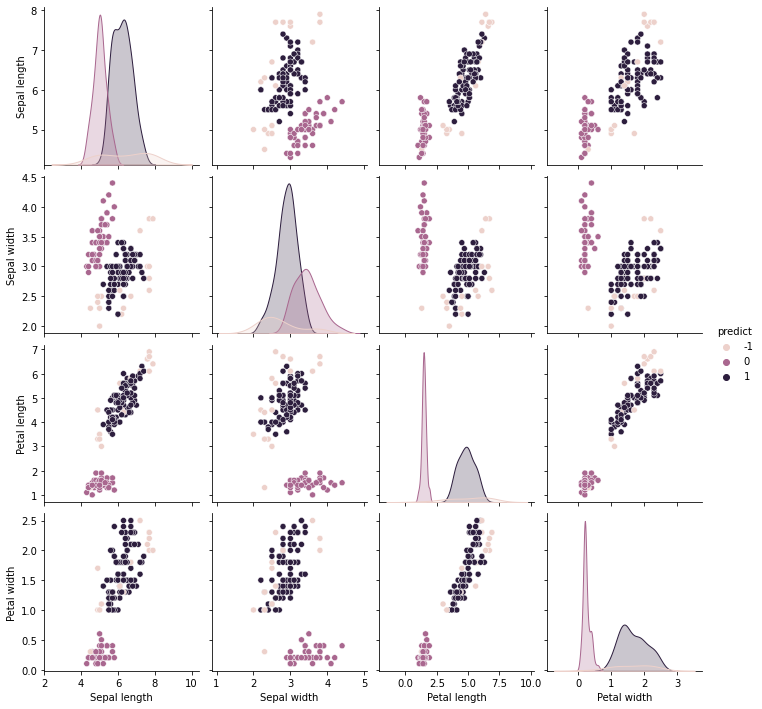

In [8]:
sns.pairplot(r, hue='predict')
plt.show()

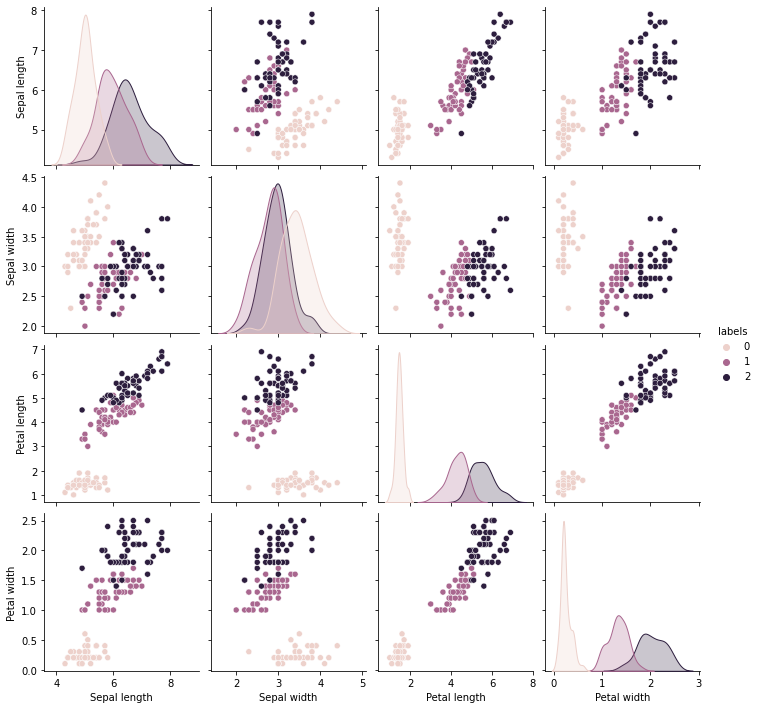

In [9]:
sns.pairplot(data, hue='labels')
plt.show()

### Kmeans와 비교

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=21)
km.fit(feature)

KMeans(n_clusters=3, random_state=21)

In [12]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns=['predict']

r2 = pd.concat([feature,new_labels],axis=1)
r2.head()

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


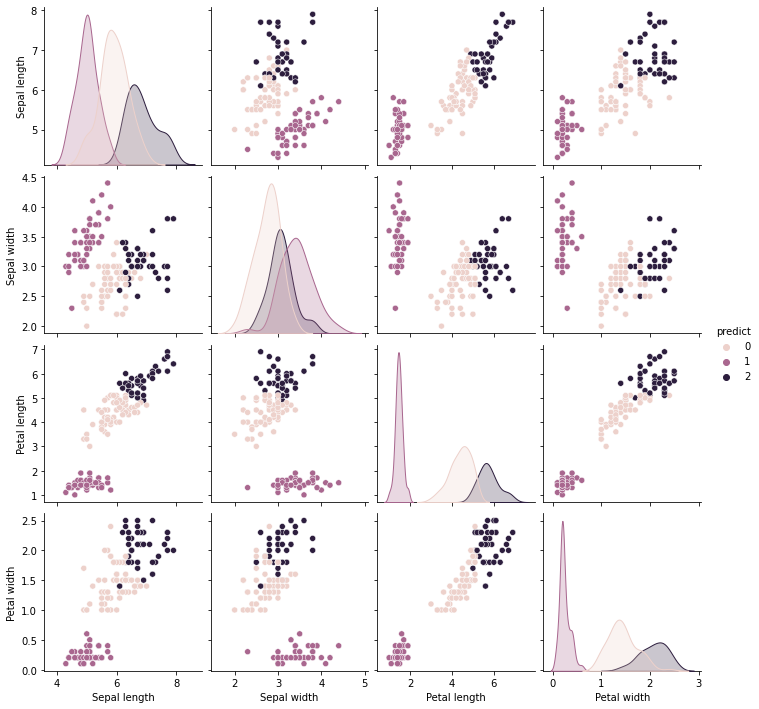

In [13]:
sns.pairplot(r2, hue='predict')
plt.show()

----

In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}

In [16]:
data = np.load('../00_Data/clusterable_data.npy')

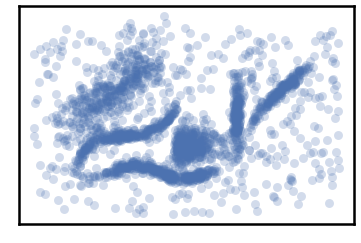

In [21]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

### Function

In [33]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

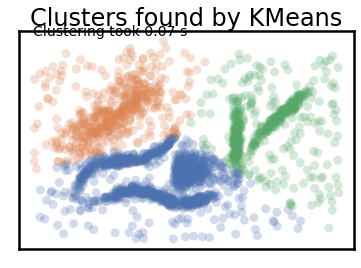

In [34]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

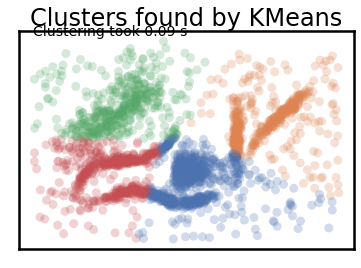

In [35]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

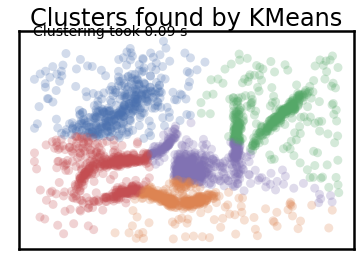

In [36]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

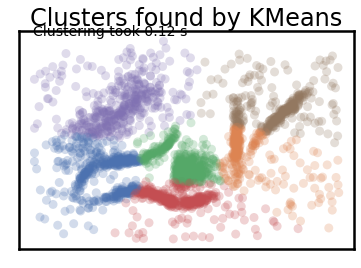

In [37]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

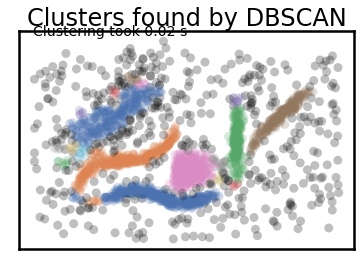

In [38]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

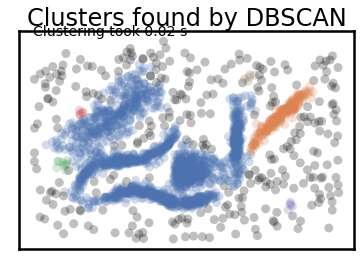

In [39]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

In [40]:
dbs = DBSCAN(eps=0.03)
dbs2 = dbs.fit(data)

In [41]:
dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0])

### HDBSCAN

DBSCAN의 발전된 버젼, 하이퍼파라미터에 덜 민감

In [ ]:
"!pip install hdbscan"

In [ ]:
import hdbscan

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':45})